# Example 1: Creating a Synthetic Dataset (MarginalSynthesizer)
In this notebook we show you how to create a simple synthetic dataset.

# Environment

## Library Imports

In [1]:
import numpy as np
import pandas as pd
from pathlib import Path
import os
import sys
module_path = os.path.abspath(os.path.join('../..'))
if module_path not in sys.path:
    sys.path.append(module_path)

## Jupyter-specific Imports and Settings

In [2]:
# set printing options
np.set_printoptions(threshold=sys.maxsize)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.expand_frame_repr', False)

# Display all cell outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

from IPython import get_ipython
ipython = get_ipython()

# autoreload extension
if 'autoreload' not in ipython.extension_manager.loaded:
    get_ipython().run_line_magic('load_ext', 'autoreload')

get_ipython().run_line_magic('autoreload', '2')
from importlib import reload

## Import Synthesizer
For this example we will use the MarginalSynthesizer algorithm. As the name suggests, this algorithm generates data based on the marginal distributions of each column that exists in the input dataset. In other words, the output synthetic data will have similar counts for each feature but the relations between features are likely not preserved. Hence, this approach is rather naive as most statistical patterns are not captured. However, it will work with datasets of any shape or size - and run relatively quickly as well. 

In [3]:
from synthesis.synthesizers.marginal import MarginalSynthesizer

# Synthetic Data Generation
Let's load a dataset to see how the generation process works.

In this case, we will use the adult dataset - source: https://archive.ics.uci.edu/ml/datasets/adult

In [5]:
df = pd.read_csv('../data/original/adult.csv', delimiter=', ', engine='python')
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


We will now import our synthesizer and fit it on the input data. 

Additionally we can specify the 'epsilon' value, which according to the definition of differential privacy is used to quantify the privacy risk posed by releasing statistics computed on sensitive data. More on that here: https://www.cis.upenn.edu/~aaroth/Papers/privacybook.pdf

In short, a lower value of epsilon will result in more randomness and v.v.

In [6]:
epsilon = 0.1

ms = MarginalSynthesizer(epsilon=epsilon)
ms.fit(df)

Marginal fitted: age
Marginal fitted: workclass
Marginal fitted: fnlwgt
Marginal fitted: education
Marginal fitted: education-num
Marginal fitted: marital-status
Marginal fitted: occupation
Marginal fitted: relationship
Marginal fitted: race
Marginal fitted: sex
Marginal fitted: capital-gain
Marginal fitted: capital-loss
Marginal fitted: hours-per-week
Marginal fitted: native-country
Marginal fitted: income


After our synthesizer has fitted the structure of the original data source, we can now use it to generate a new dataset.

In [8]:
df_synth = ms.sample()

Column sampled: age
Column sampled: workclass
Column sampled: fnlwgt
Column sampled: education
Column sampled: education-num
Column sampled: marital-status
Column sampled: occupation
Column sampled: relationship
Column sampled: race
Column sampled: sex
Column sampled: capital-gain
Column sampled: capital-loss
Column sampled: hours-per-week
Column sampled: native-country
Column sampled: income


We now obtained a new dataset which looks very similar to the original one.

In [9]:
df_synth.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,27,Self-emp-inc,269723,Bachelors,13,Divorced,Handlers-cleaners,Husband,White,Female,0,0,15,Mexico,<=50K
1,27,Private,98005,Assoc-acdm,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,4101,2267,40,United-States,<=50K
2,43,Local-gov,293073,HS-grad,9,Never-married,Machine-op-inspct,Unmarried,White,Male,1173,0,65,United-States,<=50K
3,18,Self-emp-not-inc,91911,Some-college,13,Married-civ-spouse,Adm-clerical,Wife,White,Male,0,0,40,United-States,<=50K
4,41,Local-gov,134766,HS-grad,14,Married-civ-spouse,Adm-clerical,Not-in-family,White,Male,0,2559,35,United-States,<=50K


# Utility Evaluation
NOTE: this section will be extended in the near future.

In order to evaluate the output we can examine the feature distances for each attribute, i.e. we compares the value counts for each column in the original with the synthetic dataset.

In [10]:
from synthesis.evaluation import visual

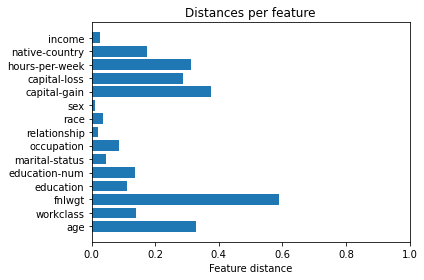

In [11]:
visual.plot_feature_distances(df, df_synth)

Just to make sure, let's generate data with a much higher level of epsilon and see whether we get improved utility. 

In [14]:
epsilon_100 = 100
ms_100 = MarginalSynthesizer(epsilon=epsilon_100)
ms_100.fit(df)
df_synth_100 = ms_100.sample()

Marginal fitted: age
Marginal fitted: workclass
Marginal fitted: fnlwgt
Marginal fitted: education
Marginal fitted: education-num
Marginal fitted: marital-status
Marginal fitted: occupation
Marginal fitted: relationship
Marginal fitted: race
Marginal fitted: sex
Marginal fitted: capital-gain
Marginal fitted: capital-loss
Marginal fitted: hours-per-week
Marginal fitted: native-country
Marginal fitted: income


Column sampled: age
Column sampled: workclass
Column sampled: fnlwgt
Column sampled: education
Column sampled: education-num
Column sampled: marital-status
Column sampled: occupation
Column sampled: relationship
Column sampled: race
Column sampled: sex
Column sampled: capital-gain
Column sampled: capital-loss
Column sampled: hours-per-week
Column sampled: native-country
Column sampled: income


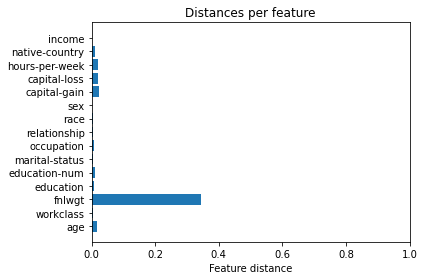

In [15]:
visual.plot_feature_distances(df, df_synth_100)

As we expect, the feature counts in the synthetic data are much closer to the original with a higher level of epsilon.

Notice that fnlwght is a continuous column with many unique values, thus it is unlikely that all of these values are sampled in the synthetic data.

Below we compare the value counts of each feature individually. 

In [16]:
visual.compare_value_counts(df, df_synth)

age
     x1    x2
17  395    70
18  550   659
19  712   217
20  753   887
21  720   894
22  765   696
23  877   838
24  798  1518
25  841   620
26  785   987
27  835  1170
28  867   104
29  813     0
30  861   681
31  888   774
32  828  1654
33  875   120
34  886   503
35  876   786
36  898   769
37  858   753
38  827   577
39  816   781
40  794   804
41  808   885
42  780   736
43  770   700
44  724   502
45  734     2
46  737   676
47  708   864
48  543   370
49  577    33
50  602    83
51  595    22
52  478   132
53  464   927
54  415   501
55  419   598
56  366   158
57  358   369
58  366   173
59  355   303
60  312   415
61  300   624
62  258   103
63  230   148
64  208   631
65  178     0
66  150    71
67  151   607
68  120     0
69  108     0
70   89     0
71   72   439
72   67  1268
73   64    62
74   51    96
75   45     0
76   46   263
77   29     0
78   23   214
79   22     0
80   22   721
81   20     0
82   12     0
83    6    95
84   10    50
85    3     0
86    1     0
87

974       2      0
hours-per-week
       x1     x2
1      20      0
10    278    700
11     11      0
12    173    619
13     23      0
14     34      0
15    404    514
16    205    211
17     29    144
18     75     58
19     14      2
2      32    946
20   1224    822
21     24    248
22     44    173
23     21    706
24    252    332
25    674    769
26     30      0
27     30      0
28     86    506
29      7    343
3      39    229
30   1149    709
31      5    478
32    266    257
33     39     89
34     28     28
35   1297   1043
36    220    111
37    149     87
38    476    226
39     38     12
4      54      0
40  15217  10687
41     36    261
42    219     90
43    151      0
44    212    382
45   1824   1034
46     82      0
47     49    119
48    517    656
49     29    165
5      60    316
50   2819   1649
51     13     79
52    138    148
53     25    181
54     41      0
55    694    337
56     97    281
57     17    276
58     28      8
59      5      0
6      64     

We have yet to evaluate the pattern preservation between features, but we do not expect that this particular algorithm will have captured those well.